ValueError: '->' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

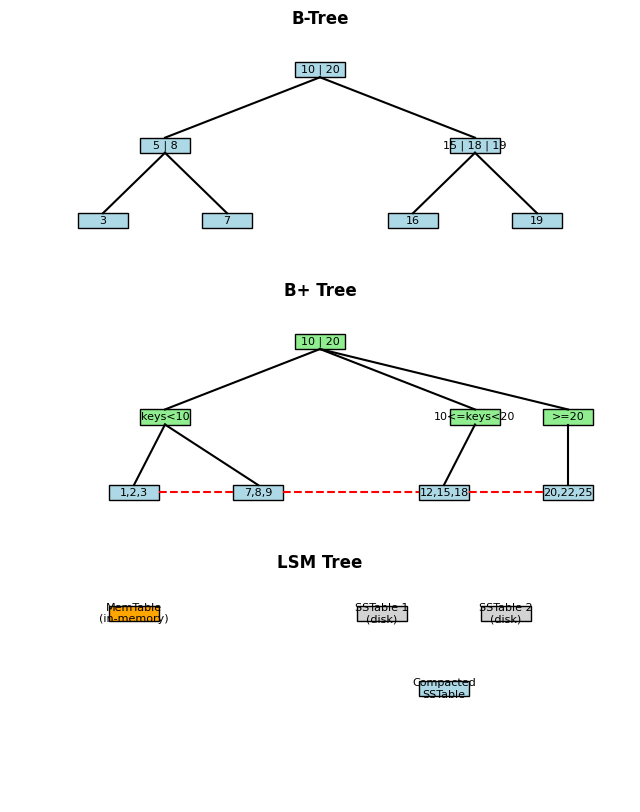

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 함수: 트리 노드 그리기
def draw_node(ax, x, y, text, width=0.8, height=0.4, fc="lightblue"):
    rect = patches.Rectangle((x - width/2, y - height/2), width, height,
                             linewidth=1, edgecolor="black", facecolor=fc)
    ax.add_patch(rect)
    ax.text(x, y, text, ha="center", va="center", fontsize=8)

# 그림 캔버스
fig, axes = plt.subplots(3, 1, figsize=(8, 10))
titles = ["B-Tree", "B+ Tree", "LSM Tree"]

# ---------------- B-Tree -----------------
ax = axes[0]
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis("off")
ax.set_title("B-Tree", fontsize=12, weight="bold")

# 루트와 자식 노드
draw_node(ax, 5, 5, "10 | 20")
draw_node(ax, 2.5, 3, "5 | 8")
draw_node(ax, 7.5, 3, "15 | 18 | 19")
draw_node(ax, 1.5, 1, "3")
draw_node(ax, 3.5, 1, "7")
draw_node(ax, 6.5, 1, "16")
draw_node(ax, 8.5, 1, "19")

# 연결선
for (x1, y1, x2, y2) in [(5,4.8,2.5,3.2),(5,4.8,7.5,3.2),
                         (2.5,2.8,1.5,1.2),(2.5,2.8,3.5,1.2),
                         (7.5,2.8,6.5,1.2),(7.5,2.8,8.5,1.2)]:
    ax.plot([x1,x2],[y1,y2],color="black")

# ---------------- B+ Tree -----------------
ax = axes[1]
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis("off")
ax.set_title("B+ Tree", fontsize=12, weight="bold")

# 루트 + 내부 노드
draw_node(ax, 5, 5, "10 | 20", fc="lightgreen")
draw_node(ax, 2.5, 3, "keys<10", fc="lightgreen")
draw_node(ax, 7.5, 3, "10<=keys<20", fc="lightgreen")
draw_node(ax, 9, 3, ">=20", fc="lightgreen")

# 리프 노드 (데이터 저장)
draw_node(ax, 2, 1, "1,2,3")
draw_node(ax, 4, 1, "7,8,9")
draw_node(ax, 7, 1, "12,15,18")
draw_node(ax, 9, 1, "20,22,25")

# 연결선
for (x1,y1,x2,y2) in [(5,4.8,2.5,3.2),(5,4.8,7.5,3.2),(5,4.8,9,3.2),
                      (2.5,2.8,2,1.2),(2.5,2.8,4,1.2),
                      (7.5,2.8,7,1.2),(9,2.8,9,1.2)]:
    ax.plot([x1,x2],[y1,y2],color="black")

# 리프 연결
ax.plot([2.4,3.6],[1,1],color="red",linestyle="--")
ax.plot([4.4,6.6],[1,1],color="red",linestyle="--")
ax.plot([7.4,8.6],[1,1],color="red",linestyle="--")

# ---------------- LSM Tree -----------------
ax = axes[2]
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis("off")
ax.set_title("LSM Tree", fontsize=12, weight="bold")

# 메모리 구조
draw_node(ax, 2, 5, "MemTable\n(in-memory)", fc="orange")

# 디스크 구조 (SSTables)
draw_node(ax, 6, 5, "SSTable 1\n(disk)", fc="lightgrey")
draw_node(ax, 8, 5, "SSTable 2\n(disk)", fc="lightgrey")

# 컴팩션 결과
draw_node(ax, 7, 3, "Compacted\nSSTable", fc="lightblue")

# 연결선
ax.plot([2.5,5.5],[5,5],color="black",linestyle="->")
ax.plot([6.5,7],[5,3.2],color="black",linestyle="->")
ax.plot([8,7.5],[5,3.2],color="black",linestyle="->")

plt.tight_layout()
plt.show()

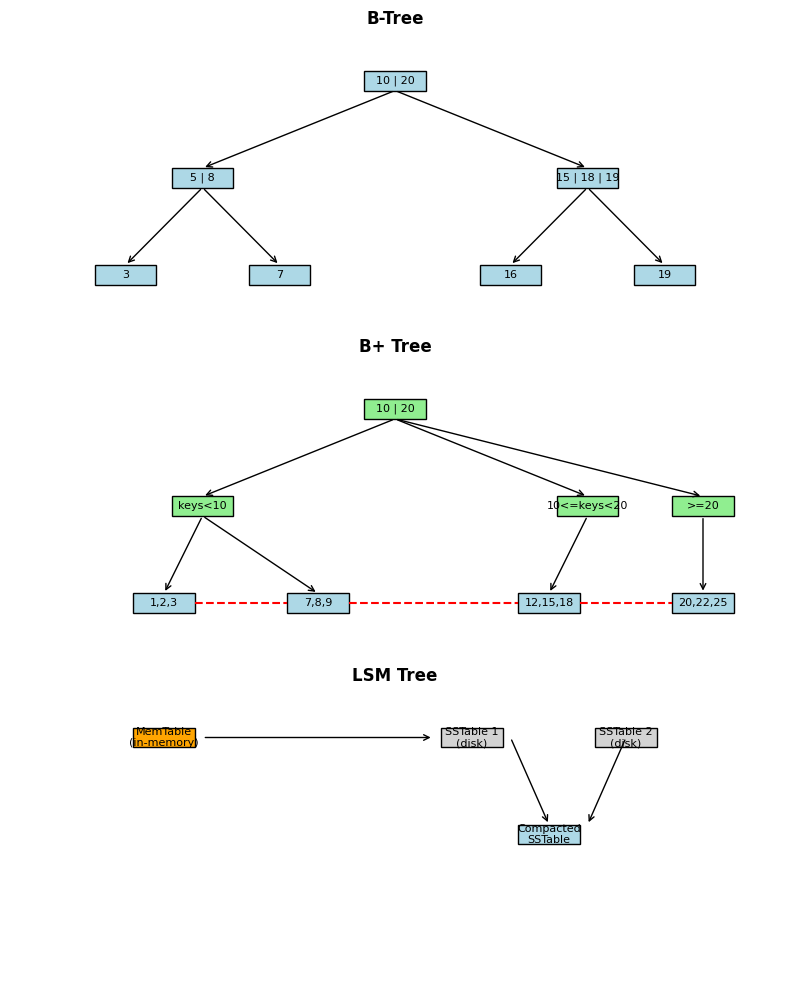

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 함수: 트리 노드 그리기
def draw_node(ax, x, y, text, width=0.8, height=0.4, fc="lightblue"):
    rect = patches.Rectangle((x - width/2, y - height/2), width, height,
                             linewidth=1, edgecolor="black", facecolor=fc)
    ax.add_patch(rect)
    ax.text(x, y, text, ha="center", va="center", fontsize=8)

# 함수: 화살표 그리기
def draw_arrow(ax, x1, y1, x2, y2):
    ax.annotate("", xy=(x2,y2), xytext=(x1,y1),
                arrowprops=dict(arrowstyle="->", color="black", lw=1))

# 그림 캔버스
fig, axes = plt.subplots(3, 1, figsize=(8, 10))
titles = ["B-Tree", "B+ Tree", "LSM Tree"]

# ---------------- B-Tree -----------------
ax = axes[0]
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis("off")
ax.set_title("B-Tree", fontsize=12, weight="bold")

# 루트와 자식 노드
draw_node(ax, 5, 5, "10 | 20")
draw_node(ax, 2.5, 3, "5 | 8")
draw_node(ax, 7.5, 3, "15 | 18 | 19")
draw_node(ax, 1.5, 1, "3")
draw_node(ax, 3.5, 1, "7")
draw_node(ax, 6.5, 1, "16")
draw_node(ax, 8.5, 1, "19")

# 연결선
for (x1, y1, x2, y2) in [(5,4.8,2.5,3.2),(5,4.8,7.5,3.2),
                         (2.5,2.8,1.5,1.2),(2.5,2.8,3.5,1.2),
                         (7.5,2.8,6.5,1.2),(7.5,2.8,8.5,1.2)]:
    draw_arrow(ax,x1,y1,x2,y2)

# ---------------- B+ Tree -----------------
ax = axes[1]
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis("off")
ax.set_title("B+ Tree", fontsize=12, weight="bold")

# 루트 + 내부 노드
draw_node(ax, 5, 5, "10 | 20", fc="lightgreen")
draw_node(ax, 2.5, 3, "keys<10", fc="lightgreen")
draw_node(ax, 7.5, 3, "10<=keys<20", fc="lightgreen")
draw_node(ax, 9, 3, ">=20", fc="lightgreen")

# 리프 노드 (데이터 저장)
draw_node(ax, 2, 1, "1,2,3")
draw_node(ax, 4, 1, "7,8,9")
draw_node(ax, 7, 1, "12,15,18")
draw_node(ax, 9, 1, "20,22,25")

# 연결선
for (x1,y1,x2,y2) in [(5,4.8,2.5,3.2),(5,4.8,7.5,3.2),(5,4.8,9,3.2),
                      (2.5,2.8,2,1.2),(2.5,2.8,4,1.2),
                      (7.5,2.8,7,1.2),(9,2.8,9,1.2)]:
    draw_arrow(ax,x1,y1,x2,y2)

# 리프 연결
ax.plot([2.4,3.6],[1,1],color="red",linestyle="--")
ax.plot([4.4,6.6],[1,1],color="red",linestyle="--")
ax.plot([7.4,8.6],[1,1],color="red",linestyle="--")

# ---------------- LSM Tree -----------------
ax = axes[2]
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis("off")
ax.set_title("LSM Tree", fontsize=12, weight="bold")

# 메모리 구조
draw_node(ax, 2, 5, "MemTable\n(in-memory)", fc="orange")

# 디스크 구조 (SSTables)
draw_node(ax, 6, 5, "SSTable 1\n(disk)", fc="lightgrey")
draw_node(ax, 8, 5, "SSTable 2\n(disk)", fc="lightgrey")

# 컴팩션 결과
draw_node(ax, 7, 3, "Compacted\nSSTable", fc="lightblue")

# 연결선
draw_arrow(ax,2.5,5,5.5,5)
draw_arrow(ax,6.5,5,7,3.2)
draw_arrow(ax,8,5,7.5,3.2)

plt.tight_layout()
plt.show()


In [2]:
import mysql.connector

conn = mysql.connector.connect(
    host='de-emr.c928wie02lla.ap-northeast-2.rds.amazonaws.com',
    user='hive',
    password='hive',
    database='hive',
    allow_local_infile=True  # 옵션 필요 시
)

cursor = conn.cursor()
cursor.execute("SHOW TABLES;")
for table in cursor.fetchall():
    print(table)

conn.close()

('AUX_TABLE',)
('BUCKETING_COLS',)
('CDS',)
('COLUMNS_V2',)
('COMPACTION_QUEUE',)
('COMPLETED_COMPACTIONS',)
('COMPLETED_TXN_COMPONENTS',)
('CTLGS',)
('DATABASE_PARAMS',)
('DBS',)
('DB_PRIVS',)
('DELEGATION_TOKENS',)
('FUNCS',)
('FUNC_RU',)
('GLOBAL_PRIVS',)
('HIVE_LOCKS',)
('IDXS',)
('INDEX_PARAMS',)
('I_SCHEMA',)
('KEY_CONSTRAINTS',)
('MASTER_KEYS',)
('MATERIALIZATION_REBUILD_LOCKS',)
('METASTORE_DB_PROPERTIES',)
('MIN_HISTORY_LEVEL',)
('MV_CREATION_METADATA',)
('MV_TABLES_USED',)
('NEXT_COMPACTION_QUEUE_ID',)
('NEXT_LOCK_ID',)
('NEXT_TXN_ID',)
('NEXT_WRITE_ID',)
('NOTIFICATION_LOG',)
('NOTIFICATION_SEQUENCE',)
('NUCLEUS_TABLES',)
('PARTITIONS',)
('PARTITION_EVENTS',)
('PARTITION_KEYS',)
('PARTITION_KEY_VALS',)
('PARTITION_PARAMS',)
('PART_COL_PRIVS',)
('PART_COL_STATS',)
('PART_PRIVS',)
('REPL_TXN_MAP',)
('ROLES',)
('ROLE_MAP',)
('RUNTIME_STATS',)
('SCHEMA_VERSION',)
('SDS',)
('SD_PARAMS',)
('SEQUENCE_TABLE',)
('SERDES',)
('SERDE_PARAMS',)
('SKEWED_COL_NAMES',)
('SKEWED_COL_VALUE_LO